In [2]:
import pandas as pd
import numpy as np

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import json

from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# LOADING CSV FILES

In [3]:
combined = pd.read_csv("data/combined.csv")

In [4]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2844 non-null   int64  
 1   aliases                      0 non-null      float64
 2   api_detail_url               2844 non-null   object 
 3   associated_images            2844 non-null   object 
 4   character_credits            2844 non-null   object 
 5   character_died_in            2844 non-null   object 
 6   concept_credits              2844 non-null   object 
 7   cover_date                   2844 non-null   object 
 8   date_added                   2844 non-null   object 
 9   date_last_updated            2844 non-null   object 
 10  deck                         127 non-null    object 
 11  description                  2814 non-null   object 
 12  first_appearance_characters  0 non-null      float64
 13  first_appearance_c

# PREPROCESSING

In [5]:
def clean_data(input_dataframe):
    df = input_dataframe.copy()
    df.drop(columns=["Unnamed: 0", "aliases", "deck", "first_appearance_characters", "first_appearance_concepts", 
                    "first_appearance_locations", "first_appearance_objects", "first_appearance_storyarcs",
                    "first_appearance_teams", "store_date"], inplace=True)
    df.dropna(subset=['name'], inplace=True)
    df['cover_date'] = pd.to_datetime(df['cover_date'], errors='coerce')
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['date_last_updated'] = pd.to_datetime(df['date_last_updated'], errors='coerce')
    df['description'] = df['description'].fillna('')
    df = df.reset_index()
    return df

In [6]:
clean_combined = clean_data(combined)

In [7]:
clean_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              2810 non-null   int64         
 1   api_detail_url     2810 non-null   object        
 2   associated_images  2810 non-null   object        
 3   character_credits  2810 non-null   object        
 4   character_died_in  2810 non-null   object        
 5   concept_credits    2810 non-null   object        
 6   cover_date         2810 non-null   datetime64[ns]
 7   date_added         2810 non-null   datetime64[ns]
 8   date_last_updated  2810 non-null   datetime64[ns]
 9   description        2810 non-null   object        
 10  has_staff_review   2810 non-null   object        
 11  id                 2810 non-null   int64         
 12  image              2810 non-null   object        
 13  issue_number       2810 non-null   object        
 14  location

In [8]:
def clean_description(html_text):
    soup = BeautifulSoup(html_text, 'html.parser')
    cleaned_text = soup.get_text(separator='\n')
    return cleaned_text

In [9]:
def get_names(json_str, index):
    json_str = json_str.replace("'",'"')
    try:
        lst = json.loads(json_str)
    except json.JSONDecodeError as e:
        print(f"JSONDecodeError at row {index}: {e}")
        return []
    names = [item["name"] for item in lst]
    return names

In [10]:
clean_combined["description"] = clean_combined["description"].apply(clean_description)

In [11]:
clean_combined['character_credits'] = clean_combined.apply(lambda row: get_names(row['character_credits'], row.name), axis=1)

JSONDecodeError at row 61: Expecting ',' delimiter: line 1 column 480 (char 479)
JSONDecodeError at row 62: Expecting ',' delimiter: line 1 column 480 (char 479)
JSONDecodeError at row 117: Expecting ',' delimiter: line 1 column 676 (char 675)
JSONDecodeError at row 154: Expecting ',' delimiter: line 1 column 476 (char 475)
JSONDecodeError at row 232: Expecting ',' delimiter: line 1 column 1061 (char 1060)
JSONDecodeError at row 235: Expecting ',' delimiter: line 1 column 1652 (char 1651)
JSONDecodeError at row 240: Expecting ',' delimiter: line 1 column 2626 (char 2625)
JSONDecodeError at row 243: Expecting ',' delimiter: line 1 column 1058 (char 1057)
JSONDecodeError at row 244: Expecting ',' delimiter: line 1 column 1058 (char 1057)
JSONDecodeError at row 257: Expecting ',' delimiter: line 1 column 2017 (char 2016)
JSONDecodeError at row 288: Expecting ',' delimiter: line 1 column 2204 (char 2203)
JSONDecodeError at row 289: Expecting ',' delimiter: line 1 column 2412 (char 2411)
JS

In [12]:
clean_combined['location_credits'] = clean_combined.apply(lambda row: get_names(row['location_credits'], row.name), axis=1)

JSONDecodeError at row 146: Expecting ',' delimiter: line 1 column 107 (char 106)
JSONDecodeError at row 355: Expecting ',' delimiter: line 1 column 890 (char 889)
JSONDecodeError at row 356: Expecting ',' delimiter: line 1 column 904 (char 903)
JSONDecodeError at row 380: Expecting ',' delimiter: line 1 column 666 (char 665)
JSONDecodeError at row 404: Expecting ',' delimiter: line 1 column 1112 (char 1111)
JSONDecodeError at row 405: Expecting ',' delimiter: line 1 column 494 (char 493)
JSONDecodeError at row 437: Expecting ',' delimiter: line 1 column 483 (char 482)
JSONDecodeError at row 471: Expecting ',' delimiter: line 1 column 506 (char 505)
JSONDecodeError at row 549: Expecting ',' delimiter: line 1 column 688 (char 687)
JSONDecodeError at row 995: Expecting ',' delimiter: line 1 column 114 (char 113)
JSONDecodeError at row 1000: Expecting ',' delimiter: line 1 column 298 (char 297)
JSONDecodeError at row 1001: Expecting ',' delimiter: line 1 column 486 (char 485)
JSONDecodeEr

In [13]:
clean_combined['person_credits'] = clean_combined.apply(lambda row: get_names(row['person_credits'], row.name), axis=1)

JSONDecodeError at row 224: Expecting ',' delimiter: line 1 column 109 (char 108)
JSONDecodeError at row 225: Expecting ',' delimiter: line 1 column 109 (char 108)
JSONDecodeError at row 227: Expecting ',' delimiter: line 1 column 109 (char 108)
JSONDecodeError at row 232: Expecting ',' delimiter: line 1 column 326 (char 325)
JSONDecodeError at row 234: Expecting ',' delimiter: line 1 column 326 (char 325)
JSONDecodeError at row 235: Expecting ',' delimiter: line 1 column 326 (char 325)
JSONDecodeError at row 237: Expecting ',' delimiter: line 1 column 543 (char 542)
JSONDecodeError at row 239: Expecting ',' delimiter: line 1 column 109 (char 108)
JSONDecodeError at row 240: Expecting ',' delimiter: line 1 column 109 (char 108)
JSONDecodeError at row 241: Expecting ',' delimiter: line 1 column 534 (char 533)
JSONDecodeError at row 242: Expecting ',' delimiter: line 1 column 738 (char 737)
JSONDecodeError at row 243: Expecting ',' delimiter: line 1 column 109 (char 108)
JSONDecodeError 

In [14]:
combined["person_credits"][0]

"[{'api_detail_url': 'https://comicvine.gamespot.com/api/person/4040-78035/', 'id': 78035, 'name': 'Amedeo Turturro', 'site_detail_url': 'https://comicvine.gamespot.com/amedeo-turturro/4040-78035/', 'role': 'editor'}, {'api_detail_url': 'https://comicvine.gamespot.com/api/person/4040-1840/', 'id': 1840, 'name': 'Andrew Hennessy', 'site_detail_url': 'https://comicvine.gamespot.com/andrew-hennessy/4040-1840/', 'role': 'inker, cover'}, {'api_detail_url': 'https://comicvine.gamespot.com/api/person/4040-45239/', 'id': 45239, 'name': 'Brad Walker', 'site_detail_url': 'https://comicvine.gamespot.com/brad-walker/4040-45239/', 'role': 'penciler, cover'}, {'api_detail_url': 'https://comicvine.gamespot.com/api/person/4040-56413/', 'id': 56413, 'name': 'Brian Cunningham', 'site_detail_url': 'https://comicvine.gamespot.com/brian-cunningham/4040-56413/', 'role': 'editor'}, {'api_detail_url': 'https://comicvine.gamespot.com/api/person/4040-41686/', 'id': 41686, 'name': 'Dan Abnett', 'site_detail_url'

# EDA

In [53]:
df = clean_combined.copy()

count    1966.000000
mean        7.740590
std         5.985721
min         0.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        75.000000
Name: num_characters, dtype: float64


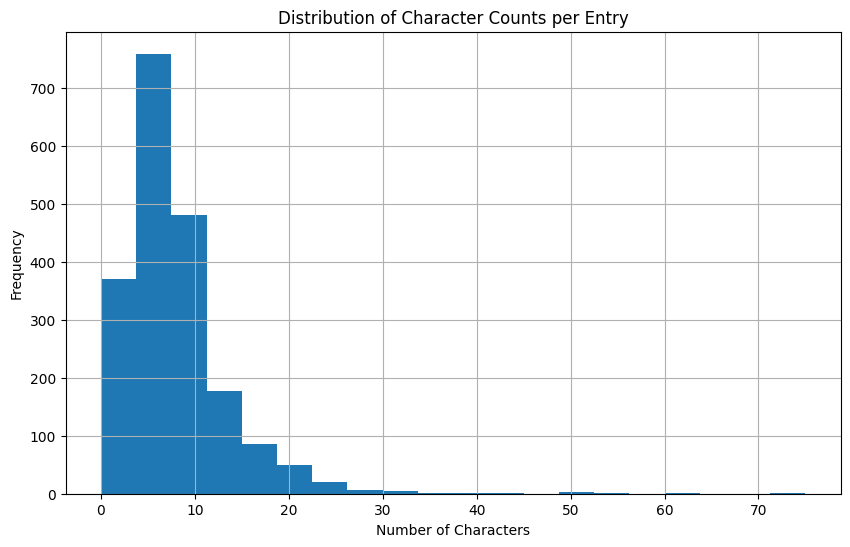

In [54]:
# Calculate the number of characters in each entry
df['num_characters'] = df['character_credits'].apply(len)

# Summary statistics for number of characters per entry
print(df['num_characters'].describe())

# Plot the distribution of character counts
plt.figure(figsize=(10, 6))
df['num_characters'].hist(bins=20)
plt.title('Distribution of Character Counts per Entry')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

              Character  Count
1                Batman   1000
767    John Constantine    632
0     Alfred Pennyworth    577
4          James Gordon    529
3          Dick Grayson    489
748           Tim Drake    380
6                 Joker    217
41             Catwoman    188
1758      Chas Chandler    158
194      Barbara Gordon    143


<Figure size 1200x800 with 0 Axes>

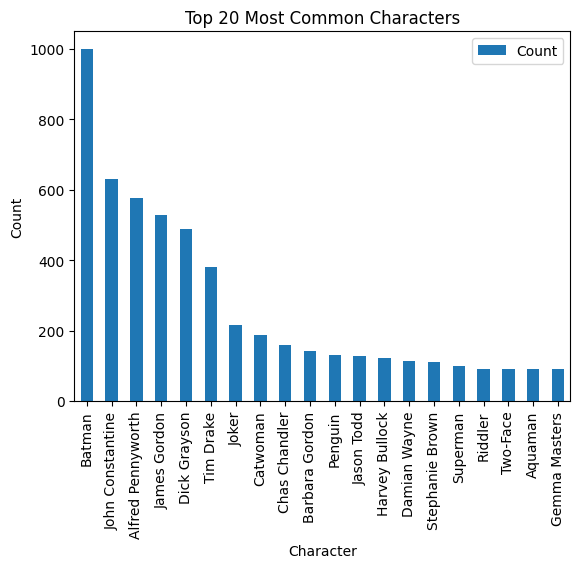

In [55]:
# Flatten the list of all characters
all_characters = [character for sublist in df['character_credits'] for character in sublist]

# Count the occurrences of each character
character_counts = Counter(all_characters)

# Convert to a DataFrame for easier analysis
character_counts_df = pd.DataFrame(character_counts.items(), columns=['Character', 'Count'])

# Sort by count in descending order
character_counts_df = character_counts_df.sort_values(by='Count', ascending=False)

# Display the most common characters
print(character_counts_df.head(10))

# Plot the most common characters
plt.figure(figsize=(12, 8))
character_counts_df.head(20).set_index('Character').plot(kind='bar')
plt.title('Top 20 Most Common Characters')
plt.xlabel('Character')
plt.ylabel('Count')
plt.show()


count    1966.000000
mean        1.909461
std         1.769099
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: num_locations, dtype: float64


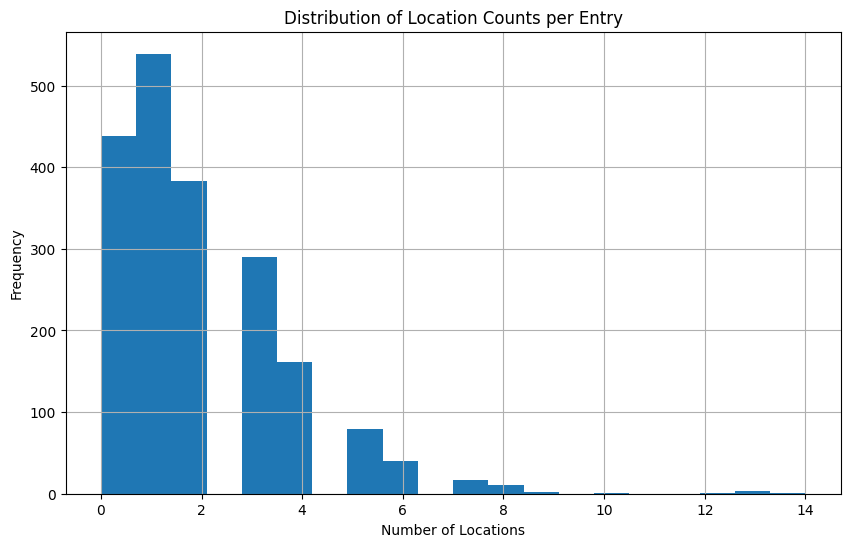

In [56]:
# Calculate the number of locations in each entry
df['num_locations'] = df['location_credits'].apply(len)

# Summary statistics for number of locations per entry
print(df['num_locations'].describe())

# Plot the distribution of location counts
plt.figure(figsize=(10, 6))
df['num_locations'].hist(bins=20)
plt.title('Distribution of Location Counts per Entry')
plt.xlabel('Number of Locations')
plt.ylabel('Frequency')
plt.show()


                      Location  Count
1                  Gotham City    962
0                      Batcave    407
9                  Wayne Manor    286
163                     London    191
8            GCPD Headquarters    128
52               Arkham Asylum     78
39                     England     75
146                       Hell     71
2    Gotham State Penitentiary     48
165                   Atlantis     41


<Figure size 1200x800 with 0 Axes>

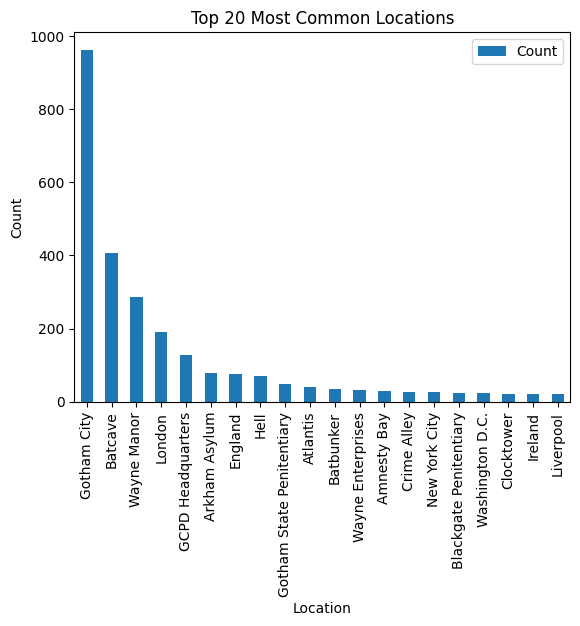

In [57]:
# Flatten the list of all locations
all_locations = [location for sublist in df['location_credits'] for location in sublist]

# Count the occurrences of each location
location_counts = Counter(all_locations)

# Convert to a DataFrame for easier analysis
location_counts_df = pd.DataFrame(location_counts.items(), columns=['Location', 'Count'])

# Sort by count in descending order
location_counts_df = location_counts_df.sort_values(by='Count', ascending=False)

# Display the most common locations
print(location_counts_df.head(10))

# Plot the most common locations
plt.figure(figsize=(12, 8))
location_counts_df.head(20).set_index('Location').plot(kind='bar')
plt.title('Top 20 Most Common Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

count    1966.000000
mean        6.475076
std         3.816549
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        65.000000
Name: num_persons, dtype: float64


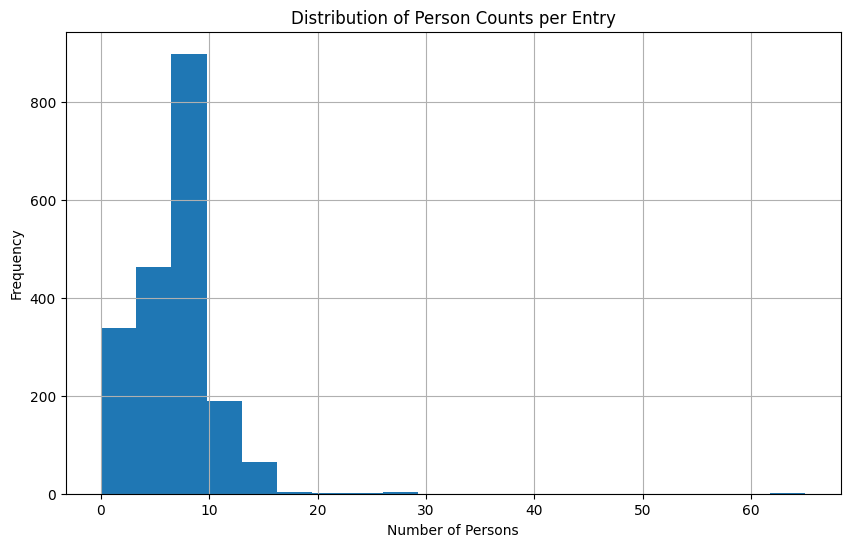

In [58]:
# Calculate the number of persons in each entry
df['num_persons'] = df['person_credits'].apply(len)

# Summary statistics for number of persons per entry
print(df['num_persons'].describe())

# Plot the distribution of person counts
plt.figure(figsize=(10, 6))
df['num_persons'].hist(bins=20)
plt.title('Distribution of Person Counts per Entry')
plt.xlabel('Number of Persons')
plt.ylabel('Frequency')
plt.show()


                Person  Count
178        Clem Robins    205
405     Lee Loughridge    178
779     Tim Bradstreet    160
1          Bill Finger    159
200  Jared K. Fletcher    155
763        Axel Alonso    148
243         Mike Marts    143
306       Sal Cipriano    138
446     Clayton Cowles    133
592  Digital Chameleon    133


<Figure size 1200x800 with 0 Axes>

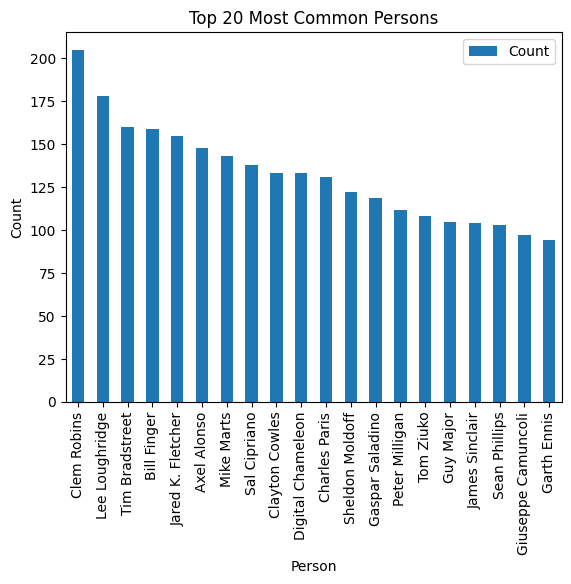

In [59]:
# Flatten the list of all persons
all_persons = [person for sublist in df['person_credits'] for person in sublist]

# Count the occurrences of each person
person_counts = Counter(all_persons)

# Convert to a DataFrame for easier analysis
person_counts_df = pd.DataFrame(person_counts.items(), columns=['Person', 'Count'])

# Sort by count in descending order
person_counts_df = person_counts_df.sort_values(by='Count', ascending=False)

# Display the most common persons
print(person_counts_df.head(10))

# Plot the most common persons
plt.figure(figsize=(12, 8))
person_counts_df.head(20).set_index('Person').plot(kind='bar')
plt.title('Top 20 Most Common Persons')
plt.xlabel('Person')
plt.ylabel('Count')
plt.show()


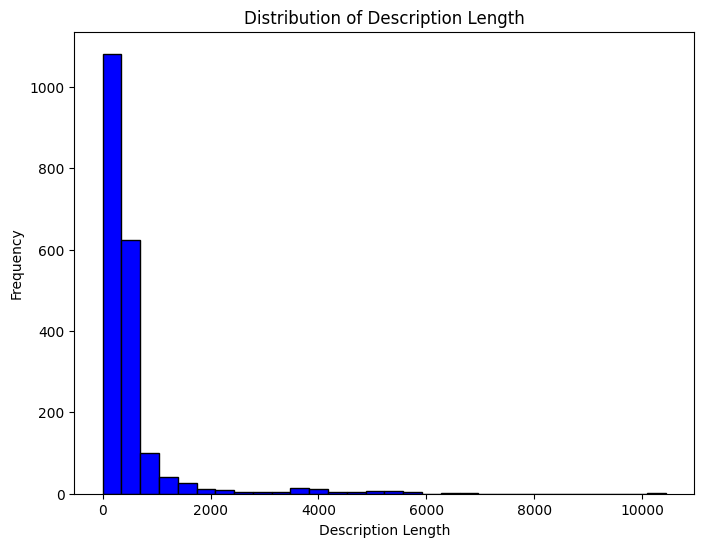

In [60]:
df['description_length'] = df['description'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8, 6))
plt.hist(df['description_length'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Description Length')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

In [61]:
df["description_length"].value_counts().sort_index().head(100)

description_length
0      37
1       2
2       3
25      1
33      1
       ..
158     2
160     4
161     4
162     3
163     3
Name: count, Length: 100, dtype: int64

In [62]:
#

In [15]:
def to_string(lst):
    string = ""
    for item in lst:
        string = string + " " + item
    return string

In [16]:
clean_combined["character_credits"] = clean_combined["character_credits"].apply(to_string)
clean_combined["location_credits"] = clean_combined["location_credits"].apply(to_string)
clean_combined["person_credits"] = clean_combined["person_credits"].apply(to_string)

In [17]:
clean_combined["combined"] = clean_combined["description"] + clean_combined["character_credits"] + clean_combined["location_credits"] + clean_combined["person_credits"]

In [18]:
clean_combined["combined"][30]

'“Take Back the Throne” part one! Arthur joins forces with his new ally Dolphin, his loyal frenemy Vulko, and the love of his life Mera, to rally the underworld of Atlantis and end the reign of the nefarious King Rath! But even as Rath doubles his efforts to destroy “the Aquaman,” dangerous new enemies begin to emerge from unexpected places…some vying for the throne themselves!\nIncludes a code for a free digital download of this issue.\nList of covers and their creators:\nCover\nName\nCreator(s)\nSidebar Location\nReg\nRegular Cover\nStjepan Šejić\n1\nVar\nVariant Cover\nJoshua Middleton\n2 Aquaman Dolphin Jurok Byss King Shark Mera Ondine Reverend Mother Cetea Vulko Atlantis The Ninth Tride The Tower of the Widowhood Alex Antone Brian Cunningham Dan Abnett Dave Wielgosz Joshua Middleton Riccardo Federici Steve Wands Stjepan Šejić Sunny Gho'

In [19]:
clean_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              2810 non-null   int64         
 1   api_detail_url     2810 non-null   object        
 2   associated_images  2810 non-null   object        
 3   character_credits  2810 non-null   object        
 4   character_died_in  2810 non-null   object        
 5   concept_credits    2810 non-null   object        
 6   cover_date         2810 non-null   datetime64[ns]
 7   date_added         2810 non-null   datetime64[ns]
 8   date_last_updated  2810 non-null   datetime64[ns]
 9   description        2810 non-null   object        
 10  has_staff_review   2810 non-null   object        
 11  id                 2810 non-null   int64         
 12  image              2810 non-null   object        
 13  issue_number       2810 non-null   object        
 14  location

In [20]:
clean_combined.to_csv("clean_data.csv")

# BASIC CONTENT-BASED RECOMMENDATION MODEL

In [21]:
tfidf = TfidfVectorizer(stop_words='english')

In [22]:
tfidf_matrix = tfidf.fit_transform(clean_combined['combined'])

In [23]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [24]:
def get_recommendations(df, title, cosine_sim=cosine_sim):
    # Get the index of the issue that matches the title
    idx = df[df['name'] == title].index[0]
    # Get the pairwise similarity scores of all issues with that issue
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the issues based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar issues
    sim_scores = sim_scores[1:11]
    # Get the issue indices
    issue_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar issues
    return df[['name', 'issue_number', 'description']].iloc[issue_indices]

In [25]:
recommendations = get_recommendations(clean_combined, "Welcome to Gotham Academy")
recommendations

,name,issue_number,description
1016,Save The Last Dance,5,This month’s assignment: Uncover the hideous s...
1013,The Diary of Millie Jane Cobblepot,2,Olive joins the creepy Order of the Bat as an ...
1015,The Secret of the Symbol,4,The hunt for the Ghost of Gotham Academy begins!
1014,The Ghost in the North Hall,3,"If you thought getting detention was a pain, j..."
1017,Pizza Club,6,"Holy cow, it’s Taco Tuesday! Oh…and Olive batt..."
1020,Calamity,9,If the gang thought it was hard to keep up wit...
1024,Yearbook Part One; Animal Science 101; Queen G...,14,An all-new era of GOTHAM ACADEMY begins here w...
1018,Curse of the Inishtree Quill,7,Special guest student Damian Wayne drops by th...
1023,Robins vs. Zombies: Robin War,13,A “Robin War” tie-in! With Robins fighting cop...
1022,Mission: Gotham,11,The gang is going downtown! Olive and Maps use...


Among the recommneded issues, most come from within the same series: Gotham Academy. 

In [26]:
feature_names = tfidf.get_feature_names_out()

In [27]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

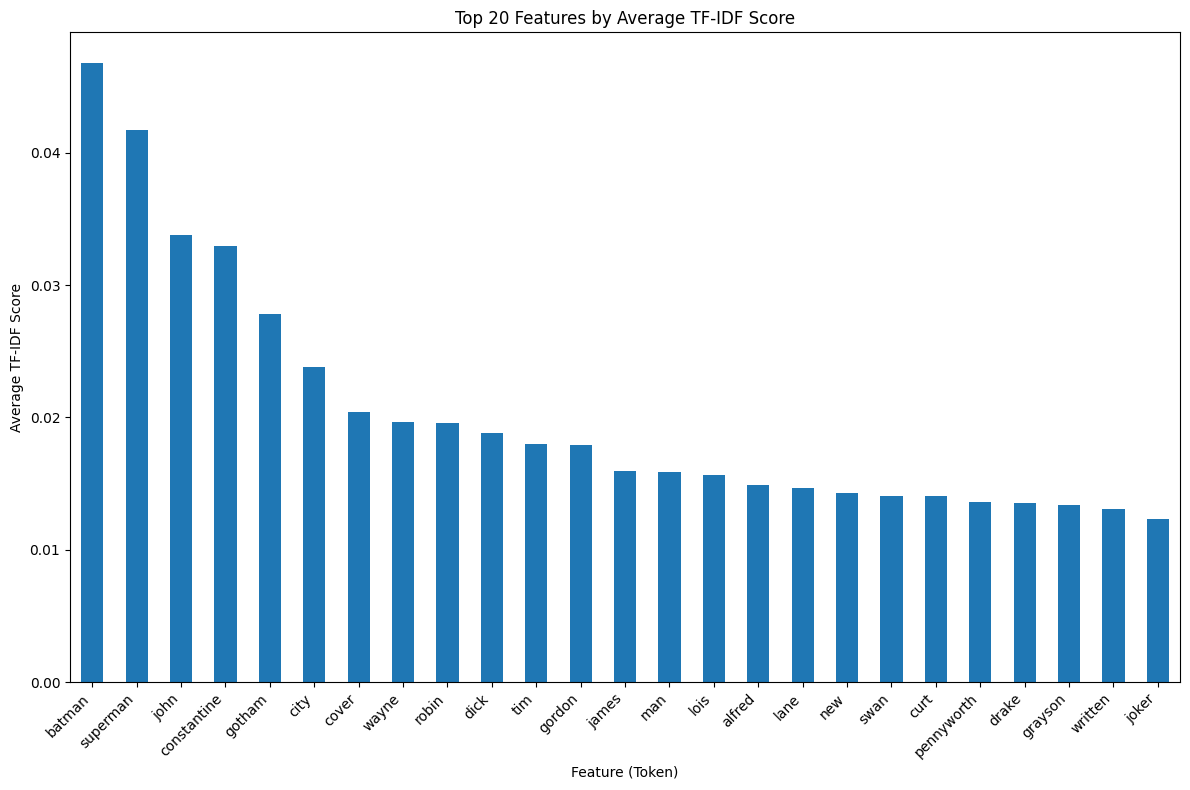

In [28]:
avg_tfidf_scores = df_tfidf.mean().sort_values(ascending=False).head(25)

plt.figure(figsize=(12, 8))
avg_tfidf_scores.plot(kind='bar')
plt.title('Top 20 Features by Average TF-IDF Score')
plt.xlabel('Feature (Token)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()